In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.regularizers import l2

In [3]:
train = pd.read_csv("data_preCO.csv")
train.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,NOx(GT),CO(GT)
0,0.706602,0.251980,0.803369,0.515949,0.435782,0.579952,0.635966,0.538977,0.873262,0.866632,0.992715,0.217987,2.6
1,0.675914,0.224622,0.793949,0.478355,0.476541,0.541041,0.591176,0.430539,0.872036,0.862540,0.992555,0.180465,2.0
2,0.725626,0.207343,0.792434,0.471935,0.464834,0.581805,0.589748,0.467909,0.866312,0.884391,0.992678,0.197141,2.2
3,0.713622,0.201584,0.793310,0.475663,0.448183,0.596628,0.599580,0.515380,0.862633,0.905371,0.992858,0.221560,2.2
4,0.666855,0.180706,0.783033,0.428956,0.487382,0.585510,0.568067,0.481131,0.863246,0.903891,0.992868,0.197141,1.6


In [4]:
threshold = train["CO(GT)"].min()
train["target"] = np.where(train["CO(GT)"] > threshold, 1, 0)
target = train["target"]
train.drop(["CO(GT)", "target"], axis=1, inplace=True)

###### 先使用简单交叉验证， 之后会用K折交叉验证重新测试

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

In [6]:
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

Unique labels in y_train: [0 1]


In [7]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1], )))
# model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6298 - loss: 0.6560 - val_accuracy: 0.8281 - val_loss: 0.4293
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8419 - loss: 0.3716 - val_accuracy: 0.9118 - val_loss: 0.2812
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9073 - loss: 0.2625 - val_accuracy: 0.9043 - val_loss: 0.2681
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9097 - loss: 0.2483 - val_accuracy: 0.9043 - val_loss: 0.2664
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9068 - loss: 0.2567 - val_accuracy: 0.9073 - val_loss: 0.2653
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9078 - loss: 0.2560 - val_accuracy: 0.9043 - val_loss: 0.2645
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9116 - loss: 0.2514 - val_accuracy: 0.9133 - val_loss: 0.2660
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9073 - loss: 0.2556 - val_accuracy:

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,061 (4.15 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 708 (2.77 KB)

In [9]:
import matplotlib.pyplot as plt

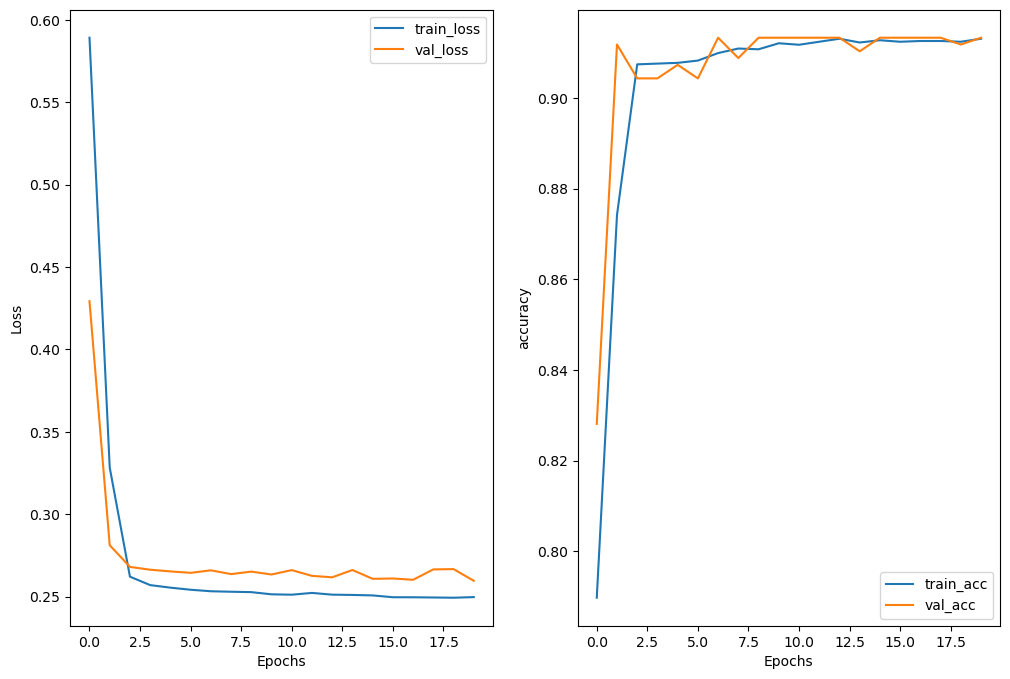

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###### 我们可以看到，在我们的疯狂炼丹下， 准确率只达到了90%, 坏消息是无论是增加层数还是隐藏节点都不会提高准确率，但是目前并没有发生过拟合.
###### 说明此时训练模型遇到瓶颈，需要对数据进行新的变化，记下来我们将对数据进行多项式变换

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_poly = poly.fit_transform(train)

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_poly.shape[1], ), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_poly, target, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7244 - loss: 1.1693 - val_accuracy: 0.9228 - val_loss: 0.4723
Epoch 2/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8641 - loss: 0.5629 - val_accuracy: 0.9228 - val_loss: 0.3355
Epoch 3/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8921 - loss: 0.4378 - val_accuracy: 0.9228 - val_loss: 0.2873
Epoch 4/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8906 - loss: 0.3926 - val_accuracy: 0.9228 - val_loss: 0.2728
Epoch 5/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8896 - loss: 0.3814 - val_accuracy: 0.9228 - val_loss: 0.2612
Epoch 6/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8952 - loss: 0.3596 - val_accuracy: 0.9222 - val_loss: 0.2467
Epoch 7/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.8928 - loss: 0.3651 - val_accuracy: 0.9228 - val_loss: 0.2449
Epoch 8/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8887 - loss: 0.3622 - va

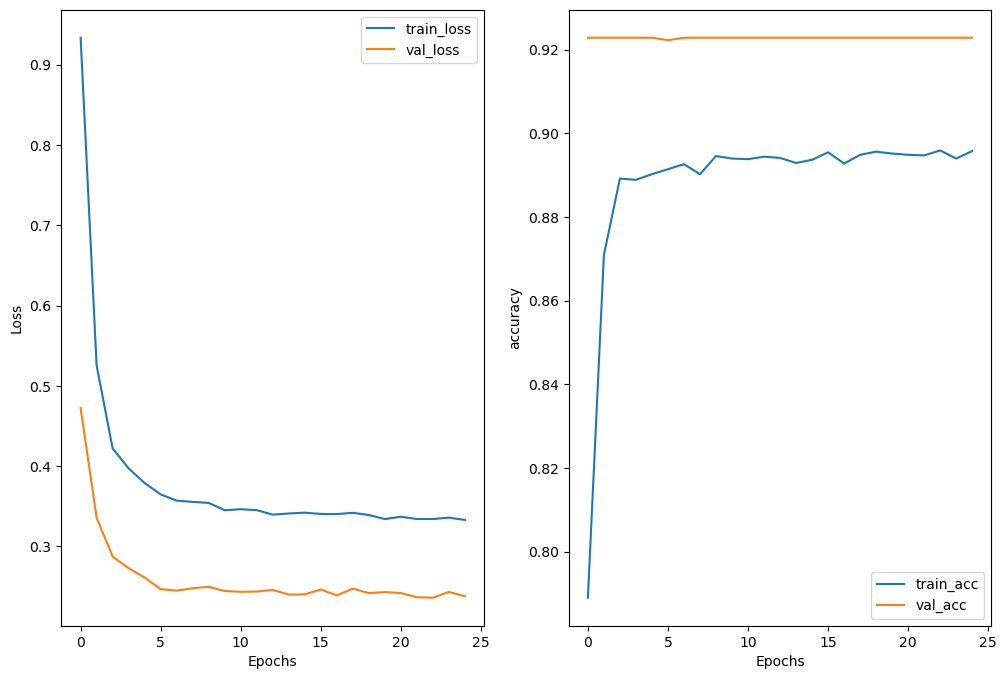

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()